# Diabetes Prediction using Demographic Data and Body Measurements

In [48]:
# Import Libraies and Datasets

from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import re
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Import Dataset

# Labs
df1 = pd.read_csv('https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/labs.csv')

#Examination
df2 = pd.read_csv('https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/examination.csv')

# Demographic
df3 = pd.read_csv('https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/demographic.csv')

# Diet
df4 = pd.read_csv('https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/diet.csv')

# Questionnaire
df5 = pd.read_csv('https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/questionnaire.csv')

df2.drop(['SEQN'], axis=1, inplace=True)
df3.drop(['SEQN'], axis=1, inplace=True)
df4.drop(['SEQN'], axis=1, inplace=True)
df5.drop(['SEQN'], axis=1, inplace=True)

df = pd.concat([df1,df2], axis=1, join='inner')
df = pd.concat([df,df3], axis=1, join='inner')
df = pd.concat([df,df4], axis=1, join='inner')
df = pd.concat([df,df5], axis=1, join='inner')

df.describe()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
count,9813.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,3329.000000,3145.000000,3145.000000,6553.000000,...,14.0,28.0,4036.000000,4842.000000,2667.000000,5879.000000,5800.000000,1424.000000,1424.000000,1424.000000
mean,78644.559971,41.218854,41.218854,121.072529,10702.811525,41.905695,78917.195254,85.898569,0.858986,4.282085,...,35.0,40.0,413.440287,567.920074,373.831646,315.447355,574.222069,2.586376,2.295646,1.747893
std,2938.592266,238.910226,238.910226,78.574882,6946.019595,276.261093,71088.020067,25.595258,0.255953,0.343649,...,0.0,0.0,1511.368399,1975.492188,1716.831150,1075.040013,7288.930842,0.782529,1.210905,0.707600
min,73557.000000,0.210000,0.210000,5.000000,442.000000,0.210000,0.000000,20.000000,0.200000,2.400000,...,35.0,40.0,75.000000,55.000000,50.000000,85.000000,10.000000,1.000000,1.000000,1.000000
25%,76092.000000,4.500000,4.500000,60.000000,5304.000000,5.020000,33217.405018,68.000000,0.680000,4.100000,...,35.0,40.0,140.000000,125.000000,63.000000,155.000000,25.000000,3.000000,1.000000,1.000000
50%,78643.000000,8.400000,8.400000,106.000000,9370.400000,7.780000,56397.702304,84.000000,0.840000,4.300000,...,35.0,40.0,165.000000,150.000000,66.000000,185.000000,38.000000,3.000000,2.000000,2.000000
75%,81191.000000,17.625000,17.625000,163.000000,14409.200000,15.295000,99356.561999,101.000000,1.010000,4.500000,...,35.0,40.0,198.000000,180.000000,70.000000,225.000000,53.000000,3.000000,3.000000,2.000000
max,83731.000000,9600.000000,9600.000000,659.000000,58255.600000,9000.000000,395978.465792,234.000000,2.340000,5.600000,...,35.0,40.0,9999.000000,9999.000000,9999.000000,9999.000000,99999.000000,9.000000,9.000000,9.000000


In [22]:
df.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [23]:
# Drop all rows and columns with empty data
df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

# Rename columns
df = df.rename(columns={'SEQN': 'ID',
                        'RIAGENDR': 'Gender',
                        'DMDYRSUS': 'Years_in_US',
                        'INDFMPIR': 'Family_income',
                        'LBXGH': 'GlycoHemoglobin',
                        'BMXARMC': 'ArmCircum',
                        'BMDAVSAD': 'SaggitalAbdominal',
                        'MGDCGSZ': 'GripStrength',
                        'DRABF': 'Breast_fed'})

# Get all the Data
df = df.loc[:, ['ID', 'Gender', 'Years_in_US', 'Family_income', 'GlycoHemoglobin', 'ArmCircum', 'SaggitalAbdominal', 'GripStrength', 'Breast_fed']]

# Describe
df.describe()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
count,9813.000000,9813.000000,1837.000000,9051.000000,6643.000000,9301.000000,7218.000000,7677.000000,8661.000000
mean,78644.559971,1.509426,8.933043,2.253101,5.642556,28.485765,21.114034,63.054891,1.984528
std,2938.592266,0.499937,17.787060,1.635458,1.004850,7.961971,4.963949,25.098439,0.123426
min,73557.000000,1.000000,1.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76092.000000,1.000000,3.000000,0.870000,5.200000,22.600000,17.300000,45.600000,2.000000
50%,78643.000000,2.000000,5.000000,1.710000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81191.000000,2.000000,7.000000,3.610000,5.800000,34.000000,24.400000,80.700000,2.000000
max,83731.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


In [24]:
# Year_in_US -> american: 0, not american: 1
df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

# Years in US NA
df['Years_in_US'] = df['Years_in_US'].apply(lambda x: x if x > 0 else 0)

# Glycohemoglobin, Saggital Abdominal, ArmCircum, GripStrength (median to fill na)
df['GlycoHemoglobin'] = df['GlycoHemoglobin'].fillna(df['GlycoHemoglobin'].median())
df['SaggitalAbdominal'] = df['SaggitalAbdominal'].fillna(df['SaggitalAbdominal'].median())
df['ArmCircum'] = df['ArmCircum'].fillna(df['ArmCircum'].median())
df['GripStrength'] = df['GripStrength'].fillna(df['GripStrength'].median())

# Family Income (ffill to fill na)
df['Family_income'] = df['Family_income'].fillna(method='ffill')

# Breast_fed (fill to 1)
df['Breast_fed'] = df['Breast_fed'].fillna(value=1)

# We remove all features with low variance
# Features with a training-set variance than 0.15 will be removed
sel = VarianceThreshold(threshold=(0.15))
sel.fit_transform(df)

df.describe()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
count,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,78644.559971,1.509426,1.672271,2.246973,5.564201,28.528248,21.004545,62.455233,1.868949
std,2938.592266,0.499937,8.446506,1.635495,0.834491,7.753571,4.261142,22.228196,0.337473
min,73557.000000,1.000000,0.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76092.000000,1.000000,0.000000,0.870000,5.300000,23.200000,18.500000,50.300000,2.000000
50%,78643.000000,2.000000,0.000000,1.700000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81191.000000,2.000000,0.000000,3.600000,5.600000,33.800000,22.900000,73.300000,2.000000
max,83731.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


**We use Glycohemoglobin to classify Diabetes**

0 -> Normal Status

1 -> High-risk Diabetes

2 -> Diabetes Patients

In [25]:
# Splitting the data into Diabetes 0-1-2
df.loc[df['GlycoHemoglobin'] < 6.0, 'Diabetes'] = 0
df.loc[(df['GlycoHemoglobin'] >= 6.0) & (df['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 1
df.loc[df['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 2

df.head(10)

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,0.0,0.84,13.9,35.3,20.6,55.2,2.0,2.0
1,73558,1,0.0,1.78,9.1,34.7,24.4,61.5,2.0,2.0
2,73559,1,0.0,4.51,8.9,33.5,25.6,91.0,2.0,2.0
3,73560,1,0.0,2.52,5.4,21.0,14.9,32.2,2.0,0.0
4,73561,2,0.0,5.00,4.9,25.2,20.7,30.9,2.0,0.0
5,73562,1,0.0,4.79,5.5,41.8,29.1,53.1,2.0,0.0
6,73563,1,0.0,5.00,5.4,14.9,20.7,60.3,1.0,0.0
7,73564,2,0.0,5.00,5.5,38.0,26.7,45.9,2.0,0.0
8,73566,1,0.0,5.00,5.4,29.0,19.9,38.8,2.0,0.0
9,73567,2,0.0,0.48,5.2,27.5,20.0,43.5,2.0,0.0


<AxesSubplot:>

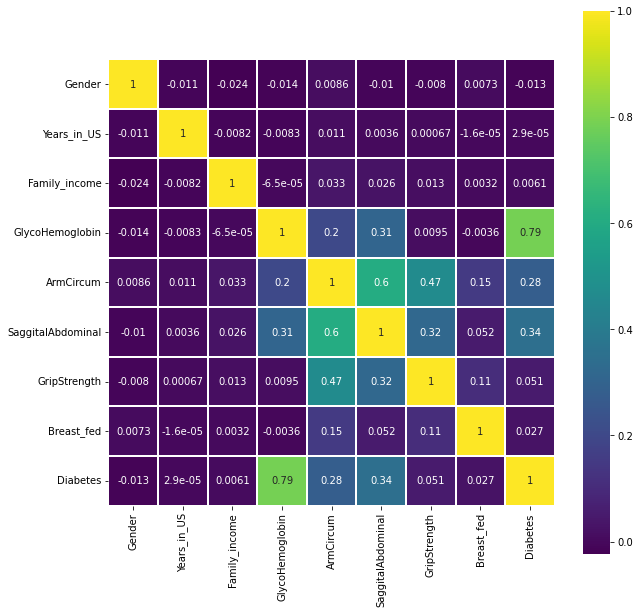

In [26]:
# Visualize

colormap =plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.astype(float).drop(axis=1, labels='ID').corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

# Creating our Model

In [27]:
df.drop(['GlycoHemoglobin'], axis=1, inplace=True)
df.head(5)

,ID,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,0.0,0.84,35.3,20.6,55.2,2.0,2.0
1,73558,1,0.0,1.78,34.7,24.4,61.5,2.0,2.0
2,73559,1,0.0,4.51,33.5,25.6,91.0,2.0,2.0
3,73560,1,0.0,2.52,21.0,14.9,32.2,2.0,0.0
4,73561,2,0.0,5.00,25.2,20.7,30.9,2.0,0.0


## Using a Simple Linear Regression Model

In [35]:
# data -> attributes, target -> diabetes
data = df.drop(['Diabetes'], axis=1)
target = df[['Diabetes']]

train_x = data[:6000]
test_x = data[6000:]
train_y = target[:6000]
test_y = target[6000:]

# Create a Linear Regression Object
linearRegression = LinearRegression()

# Training the Linear Regression Model
linearRegression.fit(train_x, train_y)

# Make a Prediction on the test set
linearRegression_prediction = linearRegression.predict(test_x)
linearRegression_score = linearRegression.score(test_x, test_y)

print(f'Linear Regression Coefficients: {linearRegression.coef_}')
print(f'Linear Regression Mean Square Error: {mean_squared_error(test_y, linearRegression_prediction)}')
print(f'Linear Regression Variance Score: {r2_score(test_y, linearRegression_prediction)}')
print(f'Score: {linearRegression.score(test_x, test_y)}')

Linear Regression Coefficients: [[ 1.98953563e-06 -2.46852260e-02 -9.10149905e-04 -5.26378493e-03
   1.12229802e-02  3.57806364e-02 -3.02433944e-03  1.73096160e-03]]
Linear Regression Mean Square Error: 0.22767455372029485
Linear Regression Variance Score: 0.1209479092466681
Score: 0.1209479092466681


In [36]:
linearRegression_prediction

array([[0.17610814],
       [0.06915668],
       [0.1792808 ],
       ...,
       [0.46134257],
       [0.19766727],
       [0.09884146]])

**Let's treat it as a Classification Problem**

## Using Adaboost with Decision Tree Classifiers

In [40]:
# Create an Adaboost Classification Object
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=0.5, random_state=100)

# Training via Adaboost Classification Model
adaboost.fit(train_x, train_y)

# Make prediction using the test set
adaboost_prediction = adaboost.predict(test_x)
print(f'Prediction: \n{adaboost_prediction}')

# Parameters
print(f'\nParameters: \n{adaboost.get_params}')

# Score
adaboost_score = adaboost.score(test_x, test_y)
print(f'\nMean Accuracy: \n{adaboost_score}')

Prediction: 
[0. 0. 0. ... 0. 0. 0.]

Parameters: 
<bound method BaseEstimator.get_params of AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.5,
                   n_estimators=100, random_state=100)>

Mean Accuracy: 
0.7123000262260687


## Bagging Decision Tree Classifiers

In [44]:
baggingDtrees = BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5, max_features= 0.5, bootstrap=False, bootstrap_features=False)

baggingDtrees.fit(train_x, train_y)
baggingDtrees_prediction = baggingDtrees.predict(test_x)

baggingDtrees_score = baggingDtrees.score(test_x, test_y)
baggingDtrees_score

0.8725413060582219

## Bagging Decision Trees KNeighbour Classifier

In [45]:
baggingKneighbours = BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.5, max_features=0.5, bootstrap=False, bootstrap_features=False)

baggingKneighbours.fit(train_x, train_y)
baggingKneighbours_prediction = baggingKneighbours.predict(test_x)

baggingKneighbours_score = baggingKneighbours.score(test_x, test_y)
baggingKneighbours_score

0.8806713873590348

## XGBoost

In [47]:
xgboost = GradientBoostingClassifier(random_state=0)
xgboost.fit(train_x, train_y)

xgboost_score = xgboost.score(test_x, test_y)
xgboost_score

0.8730658274324679

## Neural Network

In [49]:
mlp = MLPClassifier(hidden_layer_sizes=(1000,300,300), solver='adam', shuffle=False, tol=0.0001)

mlp.fit(train_x, train_y)
mlp_prediction = mlp.predict(test_x)

print(f'Parameters: {mlp.get_params}')

mlp_score = mlp.score(test_x, test_y)
mlp_score

Parameters: <bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=(1000, 300, 300), shuffle=False)>


0.8806713873590348

In [50]:
test_x

,ID,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
6000,79781,2,0.0,1.55,18.9,20.7,26.4,2.0
6001,79782,1,0.0,3.17,26.5,17.8,61.0,2.0
6002,79783,2,5.0,2.78,29.3,20.7,60.3,2.0
6003,79784,2,5.0,4.19,22.7,16.8,67.5,2.0
6004,79785,2,4.0,5.00,24.9,16.0,37.6,2.0
...,...,...,...,...,...,...,...,...
9808,83727,2,4.0,1.25,29.9,19.1,70.1,2.0
9809,83728,1,0.0,1.06,14.7,20.7,60.3,2.0
9810,83729,1,0.0,5.00,37.0,24.3,46.6,2.0
9811,83730,2,3.0,1.53,19.0,20.7,20.8,1.0


# Summarizing Performance of out Models

In [52]:
d = {'Model': ['Linear Regression', 'Adaboost', 'Bagging Decision Trees', 'Bagging KNeighbours', 'XGBoost', 'MLP'], 'Accuracy': [linearRegression_score, adaboost_score, baggingDtrees_score, baggingKneighbours_score, xgboost_score, mlp_score]}

result_df = pd.DataFrame(data=d)
result_df = result_df.sort_values(by='Accuracy', ascending=True)
result_df

,Model,Accuracy
0,Linear Regression,0.120948
1,Adaboost,0.712300
2,Bagging Decision Trees,0.872541
4,XGBoost,0.873066
3,Bagging KNeighbours,0.880671
5,MLP,0.880671


<AxesSubplot:title={'center':'Diabetes Prediction Accuracy'}, xlabel='Model'>

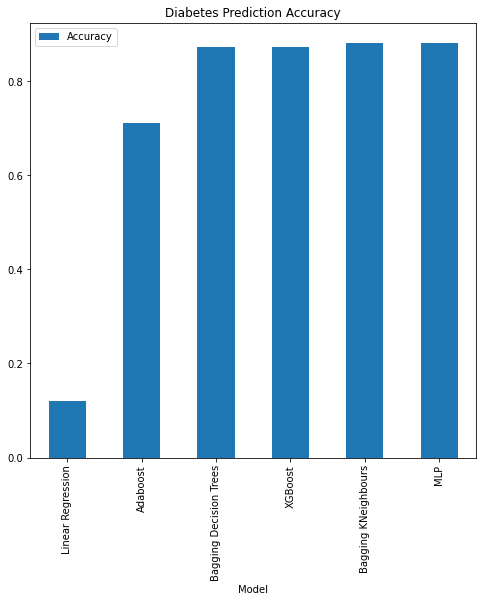

In [53]:
result_df.plot(x='Model', y='Accuracy', kind='bar', figsize=(8,8), title='Diabetes Prediction Accuracy', sort_columns=True)